# Anggota Kelompok 

1.Geza Ramda Ciptaan (21/483682/SV/20441)

2.Hanif Wafi Septya (21/483568/SV/20366)

# Business Understanding

## Latar Belakang
Laura merupakan seorang dokter di rs baiturrahmah lalu ia meminta bantuan kepada temannya Ucup untuk membantu mendiagnosis apakah pasien yang laura tangani itu terkena Heart Disease atau tidak. Sebenarnya laura sudah mendapatkan hasilnya, namun dia ragu-ragu dan ingin meminta bantuan dari Ucup karena laura tau bahwa ucup seorang data scientist. Dari hasil pemeriksaan yang didapat oleh laura, ucup membuatkan machine learning yang dapat memprediksi apakah yang diperiksa oleh laura menderita heart disease atau tidak.

## Sumber Data 
https://www.kaggle.com/ronitf/heart-disease-uci

## Metode Pendekatan
Metode pendekatan yang digunakan yaitu klasifikasi hasil prediksi berupa tipe data categorical dan numerik dengan model machine learning yang menggunakan column 'thal', 'ca', 'oldpeak', 'thalach', 'exang', 'cp'  terhadap target yang bernilai 0 , 1 

# Install Package

In [ ]:
pip install scikit-plot

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
import scikitplot as skplt

import warnings
warnings.filterwarnings('ignore') 

color = [
    '#111d5e', '#c70039', '#f37121', '#ffbd69', '#ffc93c'
]

plt.style.use('ggplot')

# Data Collection dan Processing

In [ ]:
# loading the csv data 
heart_data = pd.read_csv('/content/heart.csv')
heart_data.rename(columns ={'condition':'target'}, inplace = True)
# heart_data = heart_data[['age','sex', 'cp', 'fbs', 'chol', 'trestbps', 'condition']]

In [ ]:
#Melihat 5 data teratas
heart_data.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   69    1   0       160   234    1  ...      0      0.1      1   1     0       0
1   69    0   0       140   239    0  ...      0      1.8      0   2     0       0
2   66    0   0       150   226    0  ...      0      2.6      2   0     0       0
3   65    1   0       138   282    1  ...      0      1.4      1   1     0       1
4   64    1   0       110   211    0  ...      1      1.8      1   0     0       0

[5 rows x 14 columns]

In [ ]:
#Melihat 5 data terakhir
heart_data.tail()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
292   40    1   3       152   223    0  ...      0      0.0      0   0     2       1
293   39    1   3       118   219    0  ...      0      1.2      1   0     2       1
294   35    1   3       120   198    0  ...      1      1.6      1   0     2       1
295   35    0   3       138   183    0  ...      0      1.4      0   0     0       0
296   35    1   3       126   282    0  ...      1      0.0      0   0     2       1

[5 rows x 14 columns]

In [ ]:
# Melihat jumlah baris dan kolom
heart_data.shape

(297, 14)

In [ ]:
#General information dari data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  target    297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [ ]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# statistical measures about the data
heart_data.describe()

age         sex          cp  ...          ca        thal      target
count  297.000000  297.000000  297.000000  ...  297.000000  297.000000  297.000000
mean    54.542088    0.676768    2.158249  ...    0.676768    0.835017    0.461279
std      9.049736    0.468500    0.964859  ...    0.938965    0.956690    0.499340
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     48.000000    0.000000    2.000000  ...    0.000000    0.000000    0.000000
50%     56.000000    1.000000    2.000000  ...    0.000000    0.000000    0.000000
75%     61.000000    1.000000    3.000000  ...    1.000000    2.000000    1.000000
max     77.000000    1.000000    3.000000  ...    3.000000    2.000000    1.000000

[8 rows x 14 columns]

## Exploratory Data Analysis


In [ ]:
#menentukan data kategorial dan juga skala
categorical = [i for i in heart_data.loc[:,heart_data.nunique()<=10]]
continuous = [i for i in heart_data.loc[:,heart_data.nunique()>=10]]

In [ ]:
# fungsi untuk menampilkan plot
def ctg_dist(df, cols, hue=None,rows=3, columns=3):
    
    fig, axes = plt.subplots(rows, columns, figsize=(16, 12))
    axes = axes.flatten()

    for i, j in zip(df[cols].columns, axes):
        sns.countplot(x=i,
                    data=df,
                    palette=color,
                    hue=hue,
                    ax=j,
                    order=df[i].value_counts().index)
        j.tick_params(labelrotation=10)
        
        total = float(len(df[i]))
        
        j.set_title(f'{str(i).capitalize()} Distribution')
        
        
        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2.,
                    height + 2,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha='center')
        
        plt.tight_layout()


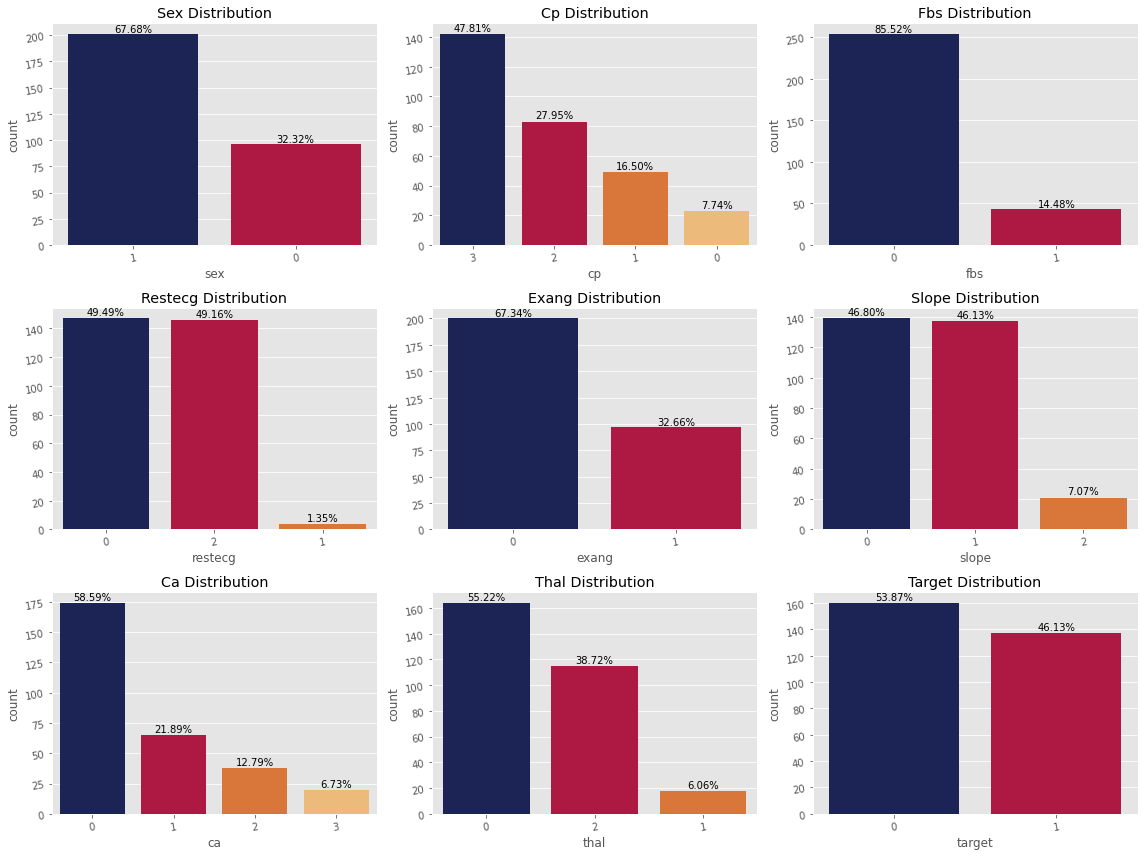

In [ ]:
# Menampilkan plot categorical
ctg_dist(heart_data, categorical)

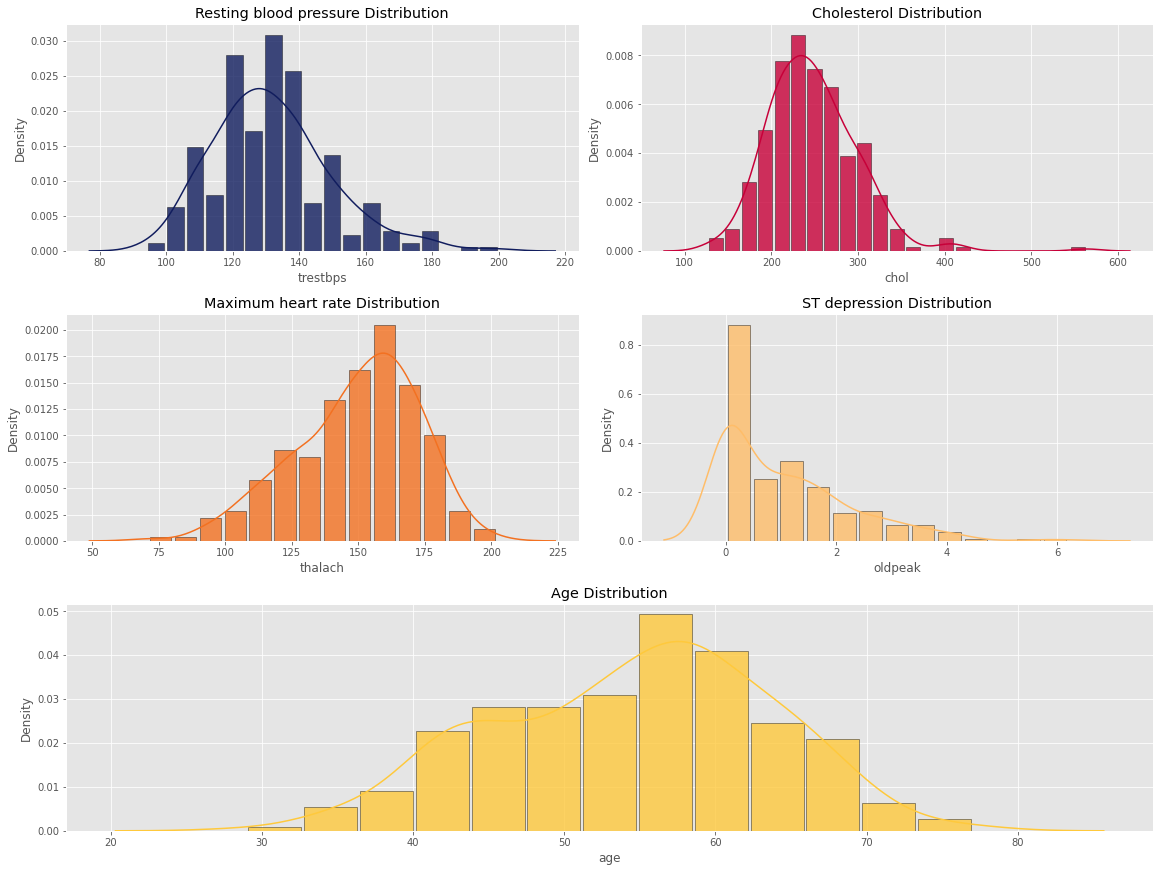

In [ ]:
import matplotlib.gridspec as gridspec

#menampilkan grafik numerical
fig = plt.figure(constrained_layout=True, figsize=(16, 12))

grid = gridspec.GridSpec(ncols=6, nrows=3, figure=fig)

ax1 = fig.add_subplot(grid[0, :3])

ax1.set_title('Resting blood pressure Distribution')

sns.distplot(heart_data[continuous[1]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color="#111d5e")

ax2 = fig.add_subplot(grid[0, 3:6])

ax2.set_title('Cholesterol Distribution')

sns.distplot(heart_data[continuous[2]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=color[1])


ax3 = fig.add_subplot(grid[1, :3])

ax3.set_title('Maximum heart rate Distribution')

sns.distplot(heart_data[continuous[3]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=color[2])

ax4 = fig.add_subplot(grid[1, 3:6])

ax4.set_title('ST depression Distribution')

sns.distplot(heart_data[continuous[4]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=color[3])

ax5 = fig.add_subplot(grid[2, :6])

ax5.set_title('Age Distribution')

sns.distplot(heart_data[continuous[0]],
                 hist_kws={
                 'rwidth': 0.95,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=color[4])

plt.show()

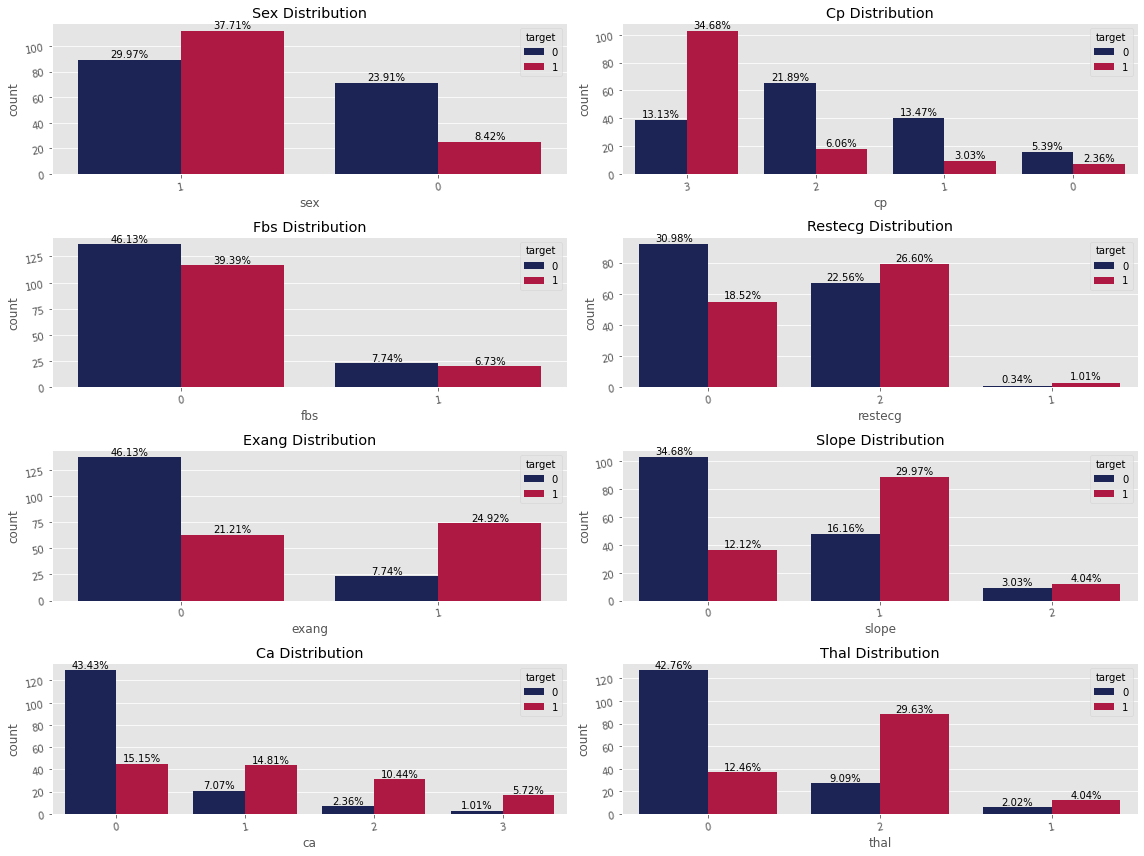

In [ ]:
# Menampilkan grafik categorical 
ctg_dist(heart_data, categorical[:-1], 'target', 4, 2)

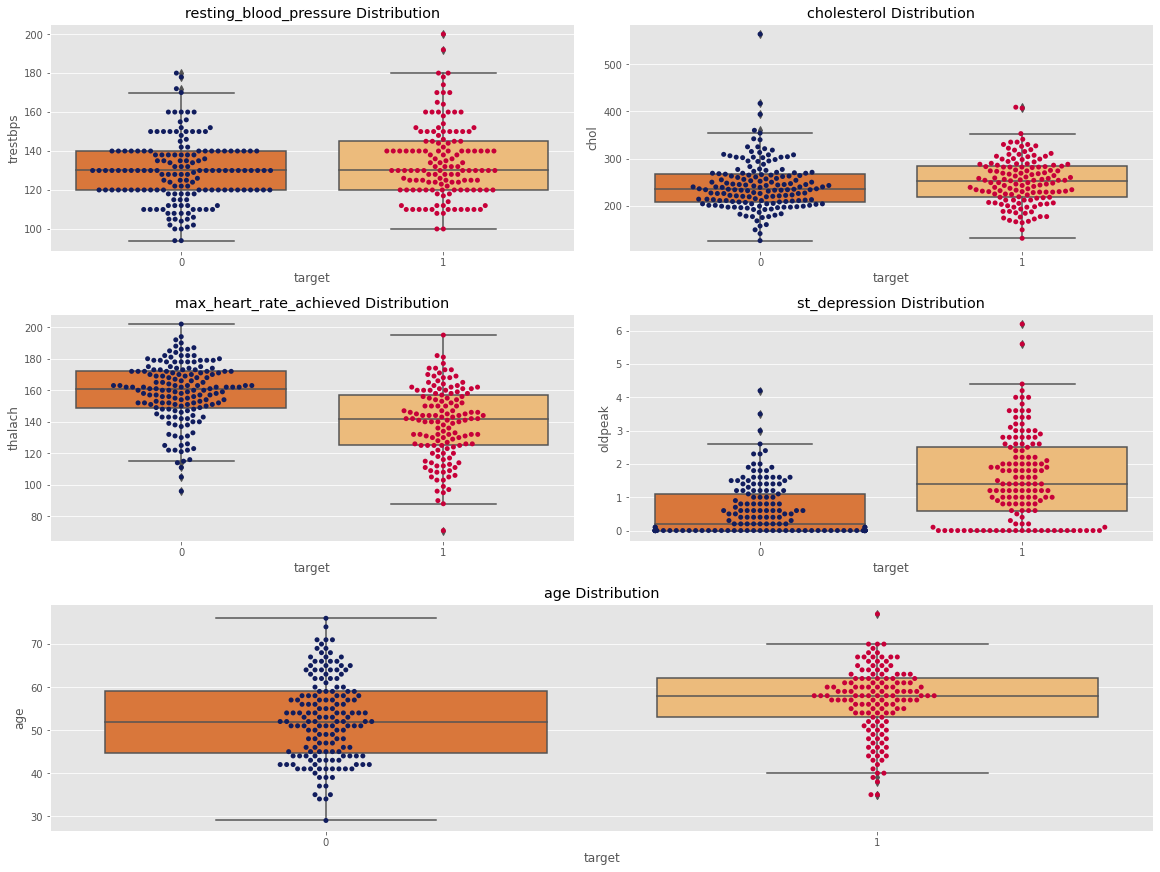

In [ ]:
# Fungsi menampilkan boxplot
fig = plt.figure(constrained_layout=True, figsize=(16, 12))

grid = gridspec.GridSpec(ncols=4, nrows=3, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])

ax1.set_title('resting_blood_pressure Distribution')

sns.boxplot(x='target',
                    y='trestbps',
                    data=heart_data,
                    palette=color[2:],
                    ax=ax1)
sns.swarmplot(x='target',
                    y='trestbps',
                    data=heart_data,
                    palette=color[:2],
                    ax=ax1)

ax2 = fig.add_subplot(grid[0, 2:])

ax2.set_title('cholesterol Distribution')

sns.boxplot(x='target',
                    y='chol',
                    data=heart_data,
                    palette=color[2:],
                    ax=ax2)
sns.swarmplot(x='target',
                    y='chol',
                    data=heart_data,
                    palette=color[:2],
                    ax=ax2)

ax3 = fig.add_subplot(grid[1, :2])

ax3.set_title('max_heart_rate_achieved Distribution')

sns.boxplot(x='target',
                    y='thalach',
                    data=heart_data,
                    palette=color[2:],
                    ax=ax3)
sns.swarmplot(x='target',
                    y='thalach',
                    data=heart_data,
                    palette=color[:2],
                    ax=ax3)

ax4 = fig.add_subplot(grid[1, 2:])

ax4.set_title('st_depression Distribution')

sns.boxplot(x='target',
                    y='oldpeak',
                    data=heart_data,
                    palette=color[2:],
                    ax=ax4)
sns.swarmplot(x='target',
                    y='oldpeak',
                    data=heart_data,
                    palette=color[:2],
                    ax=ax4)

ax5 = fig.add_subplot(grid[2, :])

ax5.set_title('age Distribution')

sns.boxplot(x='target',
                    y='age',
                    data=heart_data,
                    palette=color[2:],
                    ax=ax5)
sns.swarmplot(x='target',
                    y='age',
                    data=heart_data,
                    palette=color[:2],
                    ax=ax5)
plt.show()

In [ ]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

0    160
1    137
Name: target, dtype: int64

Sepertinya sudah balance karena jumlah nilai 0 dan 1 tidak berbeda jauh.
* Nilai 0 untuk No Heart Disease.
* Nilai 1 untuk  Heart Disease

## Feature Selection

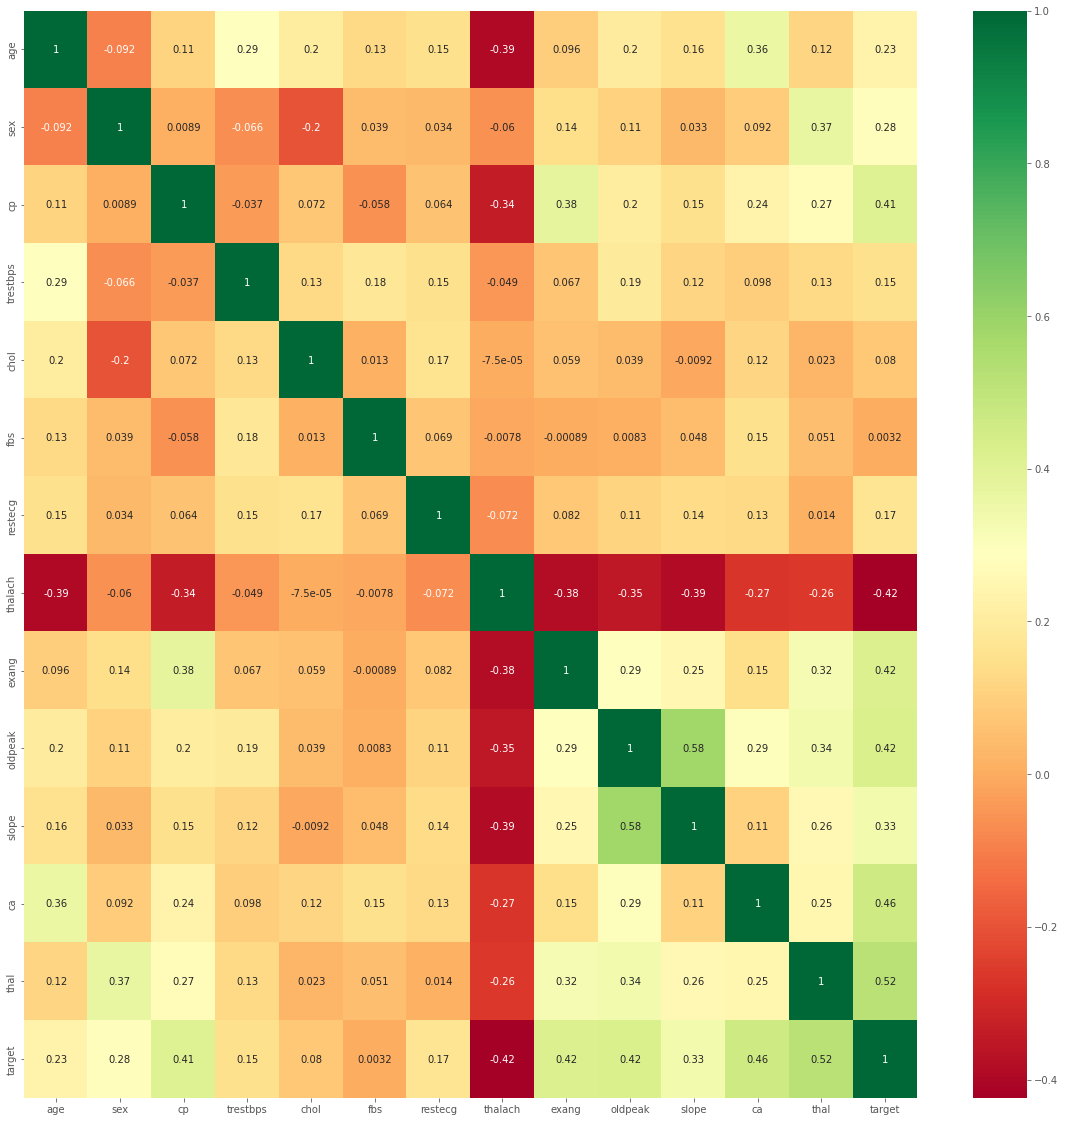

In [ ]:
## search Correlation data with heatmap
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = heart_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(heart_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# Menampilkan data heatmap
heart_data.corr()

age       sex        cp  ...        ca      thal    target
age       1.000000 -0.092399  0.110471  ...  0.362210  0.120795  0.227075
sex      -0.092399  1.000000  0.008908  ...  0.091925  0.370556  0.278467
cp        0.110471  0.008908  1.000000  ...  0.235644  0.266275  0.408945
trestbps  0.290476 -0.066340 -0.036980  ...  0.097954  0.130612  0.153490
chol      0.202644 -0.198089  0.072088  ...  0.115945  0.023441  0.080285
fbs       0.132062  0.038850 -0.057663  ...  0.152086  0.051038  0.003167
restecg   0.149917  0.033897  0.063905  ...  0.129021  0.013612  0.166343
thalach  -0.394563 -0.060496 -0.339308  ... -0.268727 -0.258386 -0.423817
exang     0.096489  0.143581  0.377525  ...  0.148232  0.323268  0.421355
oldpeak   0.197123  0.106567  0.203244  ...  0.294452  0.336809  0.424052
slope     0.159405  0.033345  0.151079  ...  0.109761  0.260096  0.333049
ca        0.362210  0.091925  0.235644  ...  1.000000  0.248825  0.463189
thal      0.120795  0.370556  0.266275  ...  0.248825  1.000000  0.520516
target    0.227075  0.278467  0.408945  ...  0.463189  0.520516  1.000000

[14 rows x 14 columns]

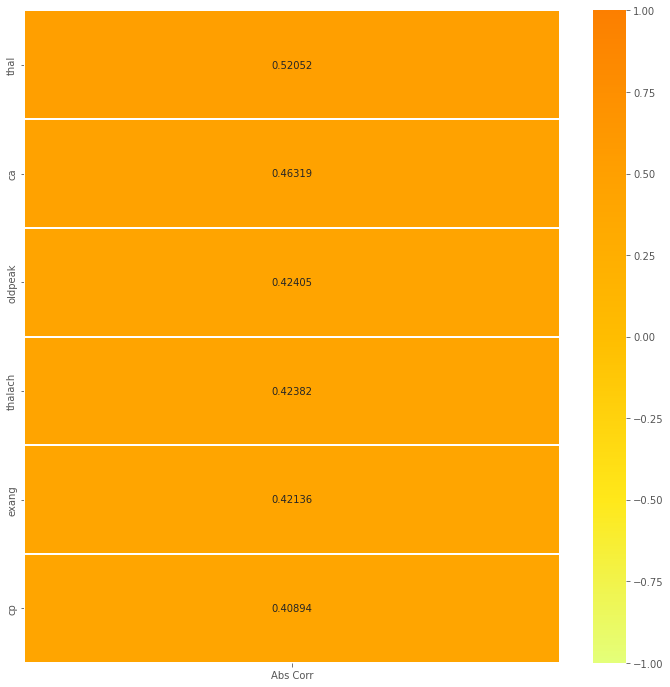

In [ ]:
#get hight correlations data
correlations = heart_data.corrwith(heart_data['target']).iloc[:-1].to_frame()
correlations['Abs Corr'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('Abs Corr', ascending=False)['Abs Corr']
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(sorted_correlations.to_frame()[sorted_correlations>=.35], cmap='Wistia', annot=True, vmin=-1, vmax=1,linewidths=1,fmt='.5f', ax=ax);

# Modelling

In [ ]:
# Create X and Y value
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
# Fungsi Transform fitur menjadi one hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

x = heart_data[['thal', 'ca', 'oldpeak', 'thalach', 'exang', 'cp']]
y = heart_data['target']

t = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(), ['thal', 'ca', 'exang', 'cp']),
    ('scale', StandardScaler(), ['oldpeak', 'thalach'])
], remainder='passthrough')

In [ ]:
# Transform fitur menjadi one hot encoding
x = t.fit_transform(x)

In [ ]:
#   X value check
print(X)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     69    1   0       160   234  ...      0      0.1      1   1     0
1     69    0   0       140   239  ...      0      1.8      0   2     0
2     66    0   0       150   226  ...      0      2.6      2   0     0
3     65    1   0       138   282  ...      0      1.4      1   1     0
4     64    1   0       110   211  ...      1      1.8      1   0     0
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
292   40    1   3       152   223  ...      0      0.0      0   0     2
293   39    1   3       118   219  ...      0      1.2      1   0     2
294   35    1   3       120   198  ...      1      1.6      1   0     2
295   35    0   3       138   183  ...      0      1.4      0   0     0
296   35    1   3       126   282  ...      1      0.0      0   0     2

[297 rows x 13 columns]


In [ ]:
#   Y value check
print(Y)

0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: target, Length: 297, dtype: int64


## Splitting the Data into Training data & Test Data

In [ ]:
#Membuat training data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [ ]:
print(x.shape, X_train.shape, X_test.shape)

(297, 15) (237, 15) (60, 15)


# Model Training

## Logistic Regression

In [ ]:
#Membuat object Logistic Regression
%%time
model = LogisticRegression()
model.fit(X_train, Y_train)

CPU times: user 13.1 ms, sys: 0 ns, total: 13.1 ms
Wall time: 15.1 ms


## Random Forest

In [ ]:
#Membuat object Random Forest
%%time
model = RandomForestClassifier()
model.fit(X_train, Y_train)

CPU times: user 163 ms, sys: 5.81 ms, total: 169 ms
Wall time: 169 ms


## KNeighborsClassifier 

In [ ]:
#Membuat object K-neightbors Classifier
%%time
model = KNeighborsClassifier()
model.fit(X_train, Y_train)

CPU times: user 1.42 ms, sys: 24 µs, total: 1.44 ms
Wall time: 1.46 ms


## Decision Tree

In [ ]:
#Membuat object DecisionTreeClassifier
%%time
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

CPU times: user 3.27 ms, sys: 106 µs, total: 3.38 ms
Wall time: 4.14 ms


# Model Evaluation

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7666666666666667


In [ ]:
#Hyperparameter tuning / penyesuaian parameter
def train_tune_model(classifier, X_train, Y_train, X_test, y_test, param_grid):
  # We use 3 fold cross validation
  tune_search = GridSearchCV(classifier, param_grid, cv=3) 

  #fit the training dataset on the classifier
  tune_search.fit(X_train, Y_train)
  print("Best Parameters \n", tune_search.best_params_)
  print("Best Estimator \n", tune_search.best_estimator_)
  print("Best Score \n", tune_search.best_score_)

  #predict the labels on validaton dataset
  predictions_valid = tune_search.predict(X_test)

  accuracy = metrics.accuracy_score(predictions_valid, y_test)

  return tune_search, accuracy, predictions_valid

In [ ]:
# get array of size names
target = heart_data['target'].astype(str).unique()

### Logistic Regression

In [ ]:
# create parameter grid to search for Logistic Regression
lr_clf = LogisticRegression()
param_grid_lr = {'C' : [0.01, 0.1, 1.0, 2.0, 3.0], "penalty":["l2",'none']}
print("Parameter grid for Logistic Regression :\n{}".format(param_grid_lr))
# tune search
tune_search_lr, accuracy_valid_lr, predictions_valid_lr = train_tune_model(lr_clf, X_train, Y_train, X_test, Y_test, param_grid_lr)

Parameter grid for Logistic Regression :
{'C': [0.01, 0.1, 1.0, 2.0, 3.0], 'penalty': ['l2', 'none']}
Best Parameters 
 {'C': 0.1, 'penalty': 'l2'}
Best Estimator 
 LogisticRegression(C=0.1)
Best Score 
 0.839662447257384


In [ ]:
#Melatih data dan menguji akurasi
modelLR = LogisticRegression(C=0.1, penalty="l2")
modelLR.fit(X_train,Y_train)
accuracy1 = modelLR.score(X_test,Y_test)
print('Logistic Regression Accuracy -->',((accuracy1)*100))

Logistic Regression Accuracy --> 86.66666666666667


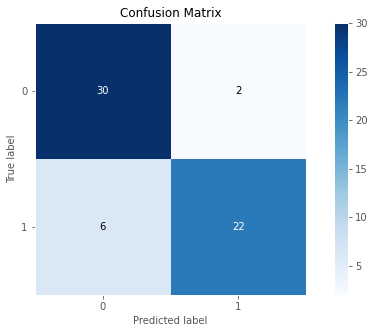

In [ ]:
# draw confussion matrix logistic regression
# cf_matrix_lr = confusion_matrix(y_test,predictions_valid_lr)
# print("CONFUSSION MATRIX")
# pd.DataFrame(cf_matrix_lr,
#     columns='Predicted ' + target,
#     index='Is ' + target)
pred1 = modelLR.predict(X_test)
matrix1 = (Y_test,pred1)
skplt.metrics.plot_confusion_matrix(Y_test, pred1,figsize=(10,5))

### Random Forest

In [ ]:
# create parameter grid to search for RandomForest
from sklearn.ensemble import RandomForestClassifier
# create parameter grid to search for Logistic Regression
rf_clf = RandomForestClassifier()
parameters = {'n_estimators': [250,500,750,1000],'criterion': ['gini','entropy'],'max_features':['auto','sqrt','log2']}
print("Parameter grid for Logistic Regression :\n{}".format(parameters))
# tune search
tune_search_lr, accuracy_valid_lr, predictions_valid_lr = train_tune_model(rf_clf, X_train, Y_train, X_test, Y_test, parameters)

Parameter grid for Logistic Regression :
{'n_estimators': [250, 500, 750, 1000], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2']}
Best Parameters 
 {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 750}
Best Estimator 
 RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=750)
Best Score 
 0.7890295358649789


In [ ]:
#Melatih data dan menguji akurasi
modelRF = RandomForestClassifier(criterion = 'gini',max_features = 'log2',n_estimators = 750, random_state = 5)
modelRF.fit(X_train,Y_train)
accuracy6 = modelRF.score(X_test,Y_test)
print('Random Forest Classifier Accuracy -->',((accuracy6)*100))

Random Forest Classifier Accuracy --> 83.33333333333334


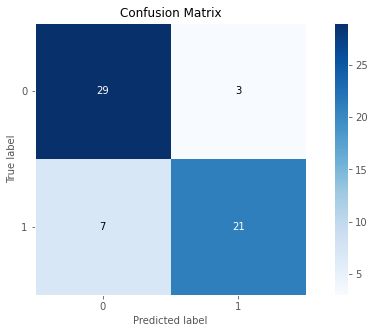

In [ ]:
# draw confussion matrix Random Forest
pred6 = modelRF.predict(X_test)
matrix6 = (Y_test,pred6)
skplt.metrics.plot_confusion_matrix(Y_test ,pred6 ,figsize=(10,5))

### K-Nearest Neighbors

Text(0, 0.5, 'Accuracy')

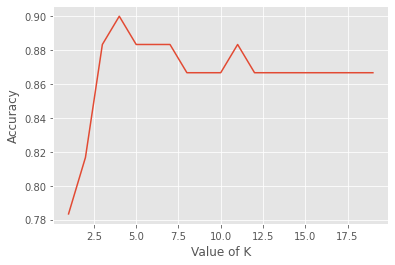

In [ ]:
# create parameter grid to search for KNeightborsClassifier
from sklearn.neighbors import KNeighborsClassifier
Krange = range(1,20)
scores = {}
scores_list = []
for k in Krange:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,Y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(Y_test,y_pred)
    scores_list.append(metrics.accuracy_score(Y_test,y_pred))
    
plt.plot(Krange,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [ ]:
#Melatih data dan menguji akurasi
modelKN = KNeighborsClassifier(n_neighbors = 4)
modelKN.fit(X_train,Y_train)
accuracy8 = modelKN.score(X_test,Y_test)
print('K-Nearest Neighbors Classifier Accuracy -->',((accuracy8)*100))

K-Nearest Neighbors Classifier Accuracy --> 90.0


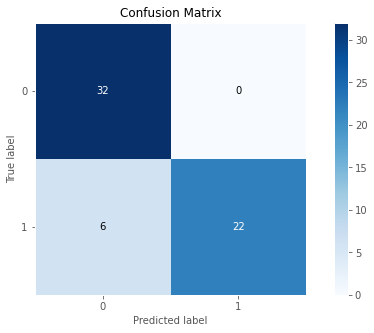

In [ ]:
# draw confussion matrix KNeightbors
pred8 = modelKN.predict(X_test)
matrix8 = (Y_test,pred8)
skplt.metrics.plot_confusion_matrix(Y_test ,pred8 ,figsize=(10,5))

### Decission Tree

In [ ]:
# create parameter grid to search for DecissionTree
from sklearn.tree import DecisionTreeClassifier
# create parameter grid to search for Logistic Regression
rf_clf = DecisionTreeClassifier()
parameters = {'criterion': ['gini','entropy']}
print("Parameter grid for Logistic Regression :\n{}".format(parameters))
# tune search
tune_search_lr, accuracy_valid_lr, predictions_valid_lr = train_tune_model(rf_clf, X_train, Y_train, X_test, Y_test, parameters)

Parameter grid for Logistic Regression :
{'criterion': ['gini', 'entropy']}
Best Parameters 
 {'criterion': 'gini'}
Best Estimator 
 DecisionTreeClassifier()
Best Score 
 0.7172995780590717


In [ ]:
#Melatih data dan menguji akurasi
modelDT = DecisionTreeClassifier(criterion = 'gini')
modelDT.fit(X_train,Y_train)
accuracy2 = modelDT.score(X_test,Y_test)
print('Decision Tree Accuracy -->',((accuracy2)*100))

Decision Tree Accuracy --> 76.66666666666667


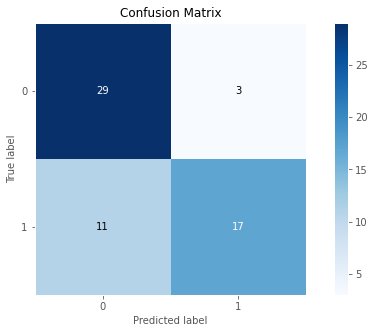

In [ ]:
# draw confussion matrix DecissionTree
pred2 = modelDT.predict(X_test)
matrix2 = (Y_test,pred2)
skplt.metrics.plot_confusion_matrix(Y_test ,pred2 ,figsize=(10,5))

## Prediction

In [ ]:
# print first 5 rows of the dataset
heart_data.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   69    1   0       160   234    1  ...      0      0.1      1   1     0       0
1   69    0   0       140   239    0  ...      0      1.8      0   2     0       0
2   66    0   0       150   226    0  ...      0      2.6      2   0     0       0
3   65    1   0       138   282    1  ...      0      1.4      1   1     0       1
4   64    1   0       110   211    0  ...      1      1.8      1   0     0       0

[5 rows x 14 columns]

* Misalkan menurut Laura, pasien yang baru ia tangani memiliki ciri-ciri medis sebagai berikut:
1. cp = 1 
2. thalach = 162
3. exang = 0
4. oldpeak = 0
5. ca = 0
6. thal = 0

In [ ]:
#prediksi
data = t.transform(pd.DataFrame([{
    'exang': 0, 
    'cp': 1, 
    'oldpeak': 0,
    'thalach': 162, 
    'ca': 0,
    'thal': 0
}]))
modelKN.predict(data)

array([0])

* Hasil Prediksi didapatkan nilai 0 yang berarti bahwa pasien yang Laura tangani tidak memiliki Heart Disease dan dapat dinyatakan sehat!


# Export model

In [ ]:
import pickle

# In this case the model variable name is tree
print('Model: ', modelKN)
model = modelKN


# Save your model
filename = '/content/finalized_model.sav'
pickle.dump(model, open(filename, 'wb+')) # write-binary and overwrite if exist

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

Model:  KNeighborsClassifier(n_neighbors=4)
0.9
